# Support Vector Machines

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()

In [23]:
from sklearn.datasets.samples_generator import make_blobs

In [24]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
X, Y

(array([[ 1.41281595,  1.5303347 ],
        [ 1.81336135,  1.6311307 ],
        [ 1.43289271,  4.37679234],
        [ 1.87271752,  4.18069237],
        [ 2.09517785,  1.0791468 ],
        [ 2.73890793,  0.15676817],
        [ 3.18515794,  0.08900822],
        [ 2.06156753,  1.96918596],
        [ 2.03835818,  1.15466278],
        [-0.04749204,  5.47425256],
        [ 1.71444449,  5.02521524],
        [ 0.22459286,  4.77028154],
        [ 1.06923853,  4.53068484],
        [ 1.53278923,  0.55035386],
        [ 1.4949318 ,  3.85848832],
        [ 1.1641107 ,  3.79132988],
        [ 0.74387399,  4.12240568],
        [ 2.29667251,  0.48677761],
        [ 0.44359863,  3.11530945],
        [ 0.91433877,  4.55014643],
        [ 1.67467427,  0.68001896],
        [ 2.26908736,  1.32160756],
        [ 1.5108885 ,  0.9288309 ],
        [ 1.65179125,  0.68193176],
        [ 2.49272186,  0.97505341],
        [ 2.33812285,  3.43116792],
        [ 0.67047877,  4.04094275],
        [-0.55552381,  4.695

Dividimos los puntos en 2 clusters (centers = 2)
* X es un conjunto de 50 puntos
* Y es una array con el índice del cluster al que pertenece cada uno de los puntos de X

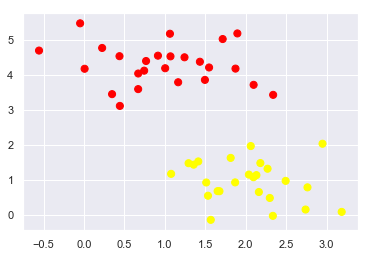

In [25]:
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap ="autumn")

(-1, 3.5)

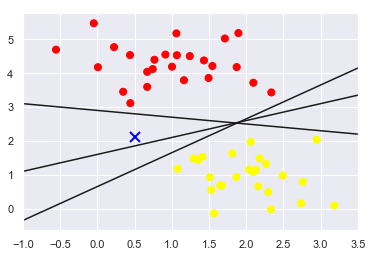

In [26]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap ="autumn")
plt.plot([0.5], [2.1], "x", color="blue", markeredgewidth=2, markersize=10)

for a, b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]: #Pendiente y ordenada en el origen de los tres puntos siguientes
    yy = a * xx + b ##Generamos la ecuación de la recta
    plt.plot(xx, yy, "-k") #Pintamos la recta para cada uno de los puntos
    
plt.xlim(-1, 3.5)

## Maximización del margen

(-1, 3.5)

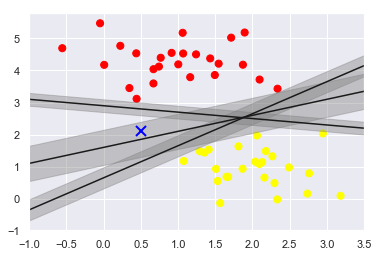

In [27]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s = 50, cmap ="autumn")
plt.plot([0.5], [2.1], "x", color="blue", markeredgewidth=2, markersize=10)

for a, b, d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]: #Pendiente y ordenada en el origen de los tres puntos siguientes
    yy = a * xx + b ##Generamos la ecuación de la recta
    plt.plot(xx, yy, "-k") #Pintamos la recta para cada uno de los puntos
    plt.fill_between(xx, yy-d, yy+d, edgecolor=None, color ="grey", alpha=0.4) #d es la distancia desde la recta al punto más cercano
    
plt.xlim(-1, 3.5)

## Creación del modelo SVM

In [28]:
from sklearn.svm import SVC

In [29]:
model = SVC(kernel="linear", C=1E10) #Kernel es el separador
model.fit(X,Y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    #Evaluar el modelo
    xy = np.vstack([X.ravel(), Y.ravel()]).T #Tupla
    P = model.decision_function(xy).reshape(X.shape)
    
    #Representamos las fronteras y los márgenes del SVC
    ax.contour(X, Y, P, colors = "k", levels = [-1,0,1], alpha = 0.5, linestyles=["--","-","--"])
    
    print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                  s = 300, linewidth = 1, facecolors="black")
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


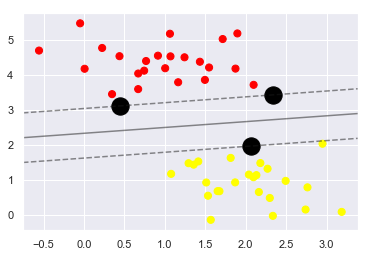

In [38]:
plt.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(model) #Ubicación de los soportes vectoriales

[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]
[[0.44359863 3.11530945]
 [1.25566754 3.38204112]
 [0.83685684 2.13635938]]


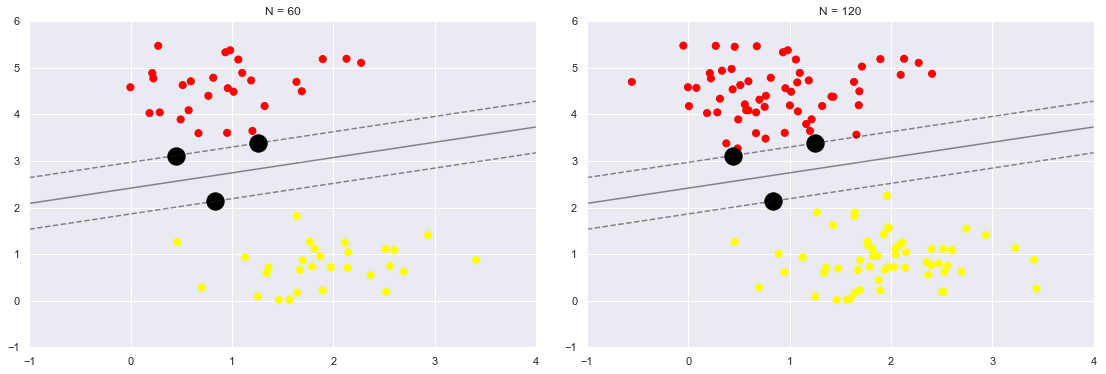

In [43]:
def plt_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    
    plt_svc(model, ax)
    
fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.026, right=0.95, wspace=0.1)

for ax_i, N in zip(ax, [60,120]):
    plt_svm(N, ax_i)
    ax_i.set_title("N = {}".format(N))
                       

In [44]:
from ipywidgets import interact, fixed

In [48]:
#Grafo interactivo
interact(plt_svm, N=[100,200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(100, 200), value=100), Output()), _dom_classes=('widg…

<function __main__.plt_svm(N=10, ax=None)>